In [ ]:
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import cv2

datagen = ImageDataGenerator(rotation_range =15, 
                     width_shift_range = 0.2, 
                     height_shift_range = 0.2,  
                     rescale=1./255, 
                     shear_range=0.2, 
                     zoom_range=0.2, 
                     horizontal_flip = True, 
                     fill_mode = 'nearest', 
                     data_format='channels_last', 
                     brightness_range=[0.5, 1.5]) 

imgs = os.listdir('periodontal_new\mild')

for img in imgs:
    img=cv2.imread('periodontal_new\mild'+"\\"+img)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    
    for batch in datagen.flow (x, batch_size=1, save_to_dir ='aug_mild', save_prefix ='aug', save_format='jpg'):
        i+=1
        if i>5:
            break

In [ ]:
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import cv2

datagen = ImageDataGenerator(rotation_range =45, 
                     width_shift_range = 0.2, 
                     height_shift_range = 0.2,  
                     rescale=1./255, 
                     shear_range=0.2, 
                     zoom_range=0.2, 
                     horizontal_flip = True, 
                     fill_mode = 'nearest', 
                     data_format='channels_last', 
                     brightness_range=[0.5, 1.5]) 

imgs = os.listdir('periodontal_new\moderate')

for img in imgs:
    img=cv2.imread('periodontal_new\moderate'+"\\"+img)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    
    for batch in datagen.flow (x, batch_size=1, save_to_dir ='augmented_moderate', save_prefix ='aug', save_format='jpg'):
        i+=1
        if i>5:
            break

In [ ]:
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import cv2

datagen = ImageDataGenerator(rotation_range =45, 
                     width_shift_range = 0.2, 
                     height_shift_range = 0.2,  
                     rescale=1./255, 
                     shear_range=0.2, 
                     zoom_range=0.2, 
                     horizontal_flip = True, 
                     fill_mode = 'nearest', 
                     data_format='channels_last', 
                     brightness_range=[0.5, 1.5]) 

imgs = os.listdir('periodontal_new\severe')

for img in imgs:
    img=cv2.imread('periodontal_new\severe'+"\\"+img)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    
    for batch in datagen.flow (x, batch_size=1, save_to_dir ='aug_severe', save_prefix ='aug', save_format='jpg'):
        i+=1
        if i>5:
            break

In [ ]:
import shutil
import os
    
source_dir = 'aug_mild'
target_dir = 'periodontal_new\mild'
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [ ]:
import shutil
import os
    
source_dir = 'augmented_moderate'
target_dir = 'periodontal_new\moderate'
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [ ]:
import shutil
import os
    
source_dir = 'aug_severe'
target_dir = 'periodontal_new\severe'
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [ ]:
#importing all the necessary library
import matplotlib.pyplot as plt
import numpy as np 
import cv2
import os
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,dtype='float32',validation_split=0.2)

train_generator = train_datagen.flow_from_directory('C:/Users/sapta/Desktop/periodontal_new', class_mode = 'categorical', target_size = (224,224),subset='training',shuffle="True")

test_generator=train_datagen.flow_from_directory('C:/Users/sapta/Desktop/periodontal_new',class_mode='categorical',target_size=(224,224),subset='validation',shuffle="True")


Found 1219 images belonging to 3 classes.
Found 303 images belonging to 3 classes.


In [ ]:
X_train, y_train = next(train_generator)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf

conv_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

for layer in conv_model.layers:
    layer.trainable = False

x = tf.keras.layers.Flatten()(conv_model.output)

x = tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.BatchNormalization()(x)

x=tf.keras.layers.Dropout(0.2)(x)


x = tf.keras.layers.Dense(512, activation='relu')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dropout(0.2)(x)



predictions = tf.keras.layers.Dense(3, activation='softmax')(x) 

model = tf.keras.models.Model(inputs=conv_model.input, outputs=predictions)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
opt1= 1e-3

In [ ]:
opt =keras.optimizers.Adam(lr=opt1)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

In [ ]:
from keras import callbacks

reduce=callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, mode='auto')

earlystopping = callbacks.EarlyStopping(monitor ="val_accuracy", 
                                        mode ="auto", patience =10,
                                        min_delta=1e-4, 
                                        restore_best_weights = True)

In [ ]:
model.fit_generator(train_generator,validation_data=(test_generator),epochs=10,callbacks=[earlystopping,reduce],verbose=1,batch_size=2)

Epoch 1/10
39/39 [==============================] - 172s 4s/step - loss: 1.2866 - accuracy: 0.5964 - val_loss: 3.3500 - val_accuracy: 0.4851
Epoch 2/10
39/39 [==============================] - 182s 5s/step - loss: 0.3597 - accuracy: 0.8564 - val_loss: 1.2840 - val_accuracy: 0.6073
Epoch 3/10
39/39 [==============================] - 170s 4s/step - loss: 0.0960 - accuracy: 0.9705 - val_loss: 1.0083 - val_accuracy: 0.6502
Epoch 4/10
39/39 [==============================] - 183s 5s/step - loss: 0.0618 - accuracy: 0.9861 - val_loss: 1.1877 - val_accuracy: 0.6139
Epoch 5/10
39/39 [==============================] - 178s 5s/step - loss: 0.0536 - accuracy: 0.9795 - val_loss: 1.0871 - val_accuracy: 0.6436
Epoch 6/10
39/39 [==============================] - 184s 5s/step - loss: 0.0347 - accuracy: 0.9885 - val_loss: 1.1204 - val_accuracy: 0.6403
Epoch 7/10
39/39 [==============================] - 174s 4s/step - loss: 0.0614 - accuracy: 0.9787 - val_loss: 1.4187 - val_accuracy: 0.6073
Epoch 8/10
39

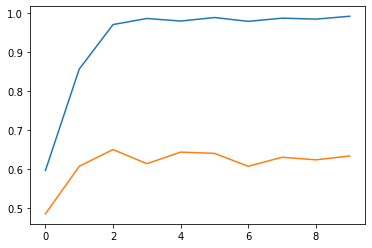

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

In [ ]:
from sklearn.metrics import classification_report 

predIdxs = model.predict_generator(train_generator)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(train_generator.labels, predIdxs,
                            target_names=["class 1", "class 2"]))#write each class name

In [ ]:
import numpy as np

predictions = model.predict(train_generator)


In [ ]:
pred=predictions.flatten()

In [ ]:
true_classes = train_generator.classes
